In [28]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import scipy

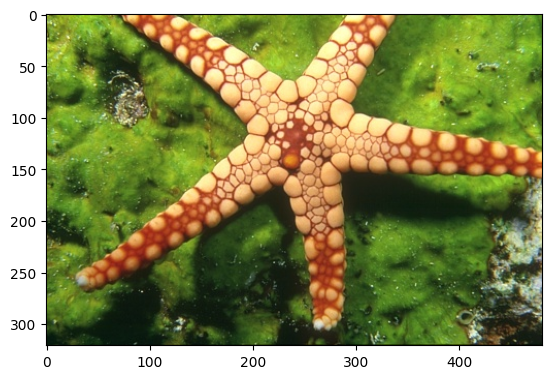

In [45]:
image_original = cv2.imread("star.jpg")
image_original  = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
plt.imshow(image_original)
plt.show()

In [17]:
import torch
import torchvision.transforms as transforms
from torchvision import models

In [ ]:
model = models.segmentation.deeplabv3_resnet101(pretrained=True)

In [ ]:
# Set the model to evaluation mode
model.eval()

In [51]:
# Define your image transformation
from PIL import Image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load and preprocess your image
image = Image.open("star.jpg")
image = transform(image)
image = image.unsqueeze(0)  # Add batch dimension

# Perform inference
with torch.no_grad():
    output = model(image)['out']

# Process the output to get the segmentation mask
output_predictions = output.argmax(1)  # Get the index of the highest probability class

# Convert the output to a numpy array for visualization or further processing
segmentation_mask = output_predictions.squeeze(0).cpu().numpy()

In [53]:
mask = np.zeros_like(segmentation_mask)
mask[segmentation_mask != 0] = 255


mask
# # Convert mask to PIL image
mask_image = Image.fromarray(mask)
Image.fromarray(mask)

# # Overlay the mask on the original image
overlayed_image = Image.blend(image.convert("RGBA"), mask_image.convert("RGBA"), alpha=0.4)

# # Display the overlayed image
plt.imshow(segmentation_mask)
plt.show()
plt.imshow(image_original)
plt.show()


TypeError: Cannot handle this data type: (1, 1), <i8